<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization**


Estimated time needed: **45** minutes


In this lab, you will focus on data visualization. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


After completing this lab, you will be able to:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition and comparison of data.




## Demo: How to work with database


Download the database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-07-11 13:26:55--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  67.1MB/s    in 2.3s    

2025-07-11 13:26:59 (67.1 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



**Install and Import Necessary Python Libraries**

Ensure that you have the required libraries installed to work with SQLite and Pandas:


In [2]:
!pip install pandas 
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 161.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 187.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 41.3 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 76.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 82.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 83.6 MB/s eta 0:00:00


**Read the CSV File into a Pandas DataFrame**

Load the Stack Overflow survey data into a Pandas DataFrame:


In [16]:
# Read the CSV file
df = pd.read_csv('survey-data.csv')

# Display the first few rows of the data
df.head(30)

Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)


**Create a SQLite Database and Insert the Data**

Now, let's create a new SQLite database (`survey-data.sqlite`) and insert the data from the DataFrame into a table using the sqlite3 library:


In [4]:
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Write the dataframe to the SQLite database
df.to_sql('main', conn, if_exists='replace', index=False)


# Close the connection
conn.close()


**Verify the Data in the SQLite Database**
Verify that the data has been correctly inserted into the SQLite database by running a simple query:


In [5]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Run a simple query to check the data
QUERY = "SELECT * FROM main LIMIT 5"
df_check = pd.read_sql_query(QUERY, conn)

# Display the results
print(df_check)


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time       None  Apples   
4   Student, full-time       None  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                               None   
4                                 

## Demo: Running an SQL Query


Count the number of rows in the table named 'main'


In [6]:
QUERY = """
SELECT COUNT(*) 
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
df.head()


,COUNT(*)
0,65437


## Demo: Listing All Tables


To view the names of all tables in the database:


In [7]:
QUERY = """
SELECT name as Table_Name FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


## Demo: Running a Group By Query
    
For example, you can group data by a specific column, like Age, to get the count of respondents in each age group:


In [8]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
pd.read_sql_query(QUERY, conn)


,Age,count
0,18-24 years old,14098
1,25-34 years old,23911
2,35-44 years old,14942
3,45-54 years old,6249
4,55-64 years old,2575
5,65 years or older,772
6,Prefer not to say,322
7,Under 18 years old,2568


## Demo: Describing a table

Use this query to get the schema of a specific table, main in this case:


In [9]:
table_name = 'main'

QUERY = """
SELECT sql FROM sqlite_master 
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY, conn)
print(df.iat[0,0])


CREATE TABLE "main" (
"ResponseId" INTEGER,
  "MainBranch" TEXT,
  "Age" TEXT,
  "Employment" TEXT,
  "RemoteWork" TEXT,
  "Check" TEXT,
  "CodingActivities" TEXT,
  "EdLevel" TEXT,
  "LearnCode" TEXT,
  "LearnCodeOnline" TEXT,
  "TechDoc" TEXT,
  "YearsCode" TEXT,
  "YearsCodePro" TEXT,
  "DevType" TEXT,
  "OrgSize" TEXT,
  "PurchaseInfluence" TEXT,
  "BuyNewTool" TEXT,
  "BuildvsBuy" TEXT,
  "TechEndorse" TEXT,
  "Country" TEXT,
  "Currency" TEXT,
  "CompTotal" REAL,
  "LanguageHaveWorkedWith" TEXT,
  "LanguageWantToWorkWith" TEXT,
  "LanguageAdmired" TEXT,
  "DatabaseHaveWorkedWith" TEXT,
  "DatabaseWantToWorkWith" TEXT,
  "DatabaseAdmired" TEXT,
  "PlatformHaveWorkedWith" TEXT,
  "PlatformWantToWorkWith" TEXT,
  "PlatformAdmired" TEXT,
  "WebframeHaveWorkedWith" TEXT,
  "WebframeWantToWorkWith" TEXT,
  "WebframeAdmired" TEXT,
  "EmbeddedHaveWorkedWith" TEXT,
  "EmbeddedWantToWorkWith" TEXT,
  "EmbeddedAdmired" TEXT,
  "MiscTechHaveWorkedWith" TEXT,
  "MiscTechWantToWorkWith" TEXT,


## Hands-on Lab


### Visualizing the Distribution of Data

**Histograms**

Plot a histogram of CompTotal (Total Compensation).


In [79]:
QUERY = """
SELECT CompTotal
FROM main
"""
df = pd.read_sql_query(QUERY, conn)

['CompTotal']


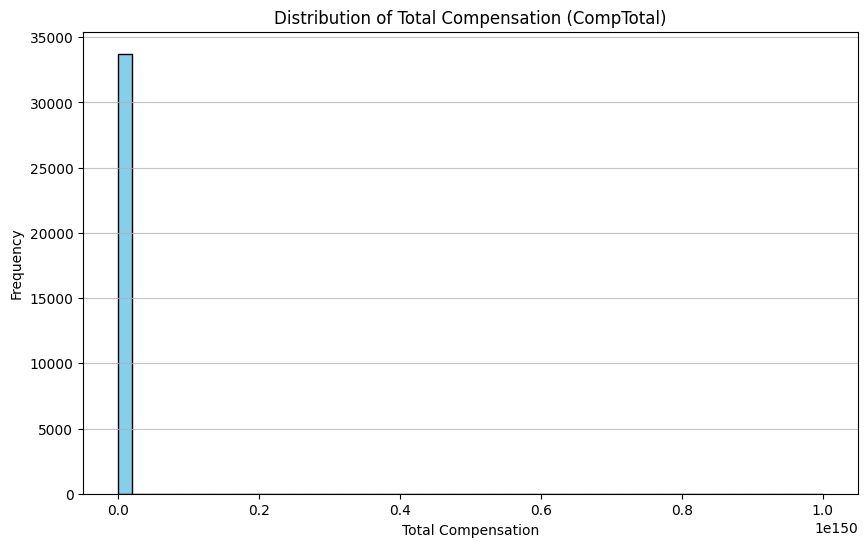

In [80]:
plt.figure(figsize=(10, 6))
plt.hist(df['CompTotal'].dropna(), bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Compensation (CompTotal)')
plt.xlabel('Total Compensation')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

**Box Plots**

Plot a box plot of Age.


In [81]:
QUERY = """
SELECT Age
FROM main
"""
df = pd.read_sql_query(QUERY, conn)

In [82]:
# Optional mapping if Age is categorical
age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29,
    '35-44 years old': 39,
    '45-54 years old': 49,
    '55-64 years old': 59,
    '65 years or older': 70
}

df['AgeMapped'] = df['Age'].map(age_map)


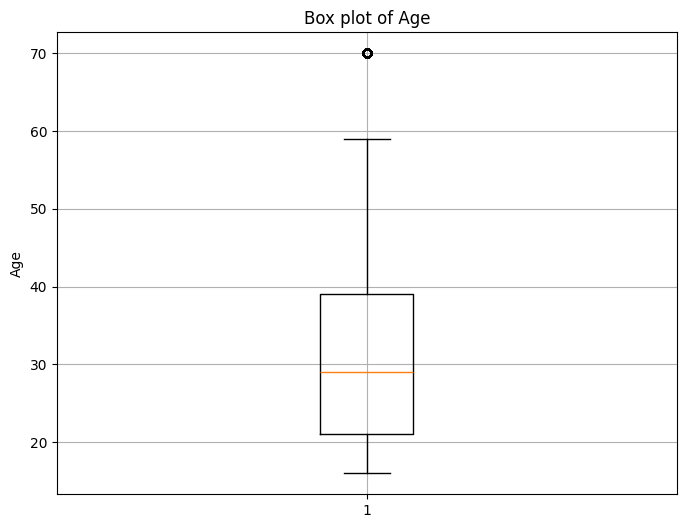

In [83]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['AgeMapped'].dropna())
plt.title('Box plot of Age')
plt.ylabel('Age')
plt.grid(True)
plt.show()

### Visualizing Relationships in Data

**Scatter Plots**

Create a scatter plot of Age and WorkExp.


In [84]:
QUERY = """
SELECT Age, WorkExp
FROM main
"""
df = pd.read_sql_query(QUERY, conn)

In [85]:
# Map Age ranges to approximate numeric values
age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29,
    '35-44 years old': 39,
    '45-54 years old': 49,
    '55-64 years old': 59,
    '65 years or older': 70
}

df['AgeNumeric'] = df['Age'].map(age_map)


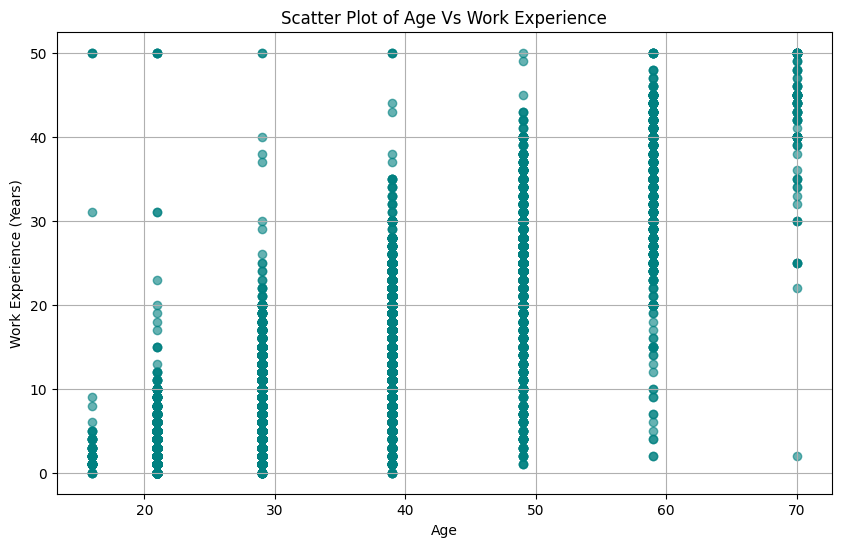

In [86]:
plt.figure(figsize=(10, 6))
plt.scatter(df['AgeNumeric'], df['WorkExp'], alpha=0.6, color='teal')
plt.title('Scatter Plot of Age Vs Work Experience')
plt.xlabel('Age')
plt.ylabel('Work Experience (Years)')
plt.grid(True)
plt.show()

**Bubble Plots**

Create a bubble plot of `TimeSearching` and `Frustration` using the Age column as the bubble size.


In [98]:
QUERY = """
SELECT 
    Age, 
    AVG(TimeSearching) AS AvgTimeSearching, 
    AVG(Frustration) AS AvgFrustration
FROM main
WHERE 
    Age IS NOT NULL AND TimeSearching IS NOT NULL AND Frustration IS NOT NULL
GROUP BY 
    Age
"""
df = pd.read_sql_query(QUERY, conn)

['Age', 'AvgTimeSearching', 'AvgFrustration']


In [102]:
age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29,
    '35-44 years old': 39,
    '45-54 years old': 49,
    '55-64 years old': 59,
    '65 years or older': 70
}
df['AgeNumeric'] = df['Age'].map(age_map)

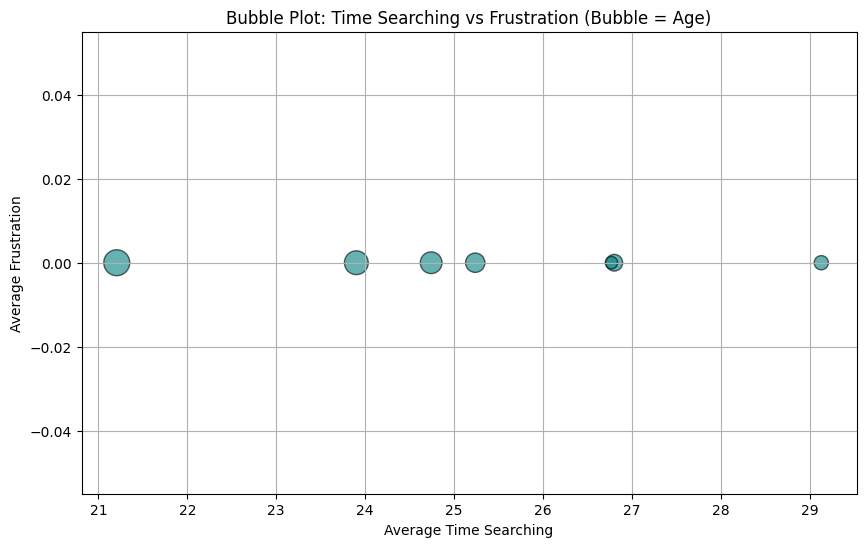

In [103]:
plt.figure(figsize=(10, 6))
plt.scatter(
    df['AvgTimeSearching'],
    df['AvgFrustration'],
    s=df['AgeNumeric'] * 5,  # Bubble size
    alpha=0.6,
    color='teal',
    edgecolors='black'
)

plt.xlabel('Average Time Searching')
plt.ylabel('Average Frustration')
plt.title('Bubble Plot: Time Searching vs Frustration (Bubble = Age)')
plt.grid(True)
plt.show()


# Visualizing Composition of Data

**Pie Charts**

Create a pie chart of the top 5 databases(`DatabaseWantToWorkWith`) that respondents wish to learn next year.


In [105]:
QUERY = """
SELECT DatabaseWantToWorkWith 
FROM main
WHERE DatabaseWantToWorkWith IS NOT NULL
"""
pd.read_sql_query(QUERY, conn)

,DatabaseWantToWorkWith
0,PostgreSQL
1,Firebase Realtime Database
2,MongoDB;MySQL;PostgreSQL
3,PostgreSQL;SQLite
4,Cloud Firestore
...,...
42553,Dynamodb
42554,BigQuery;Cassandra;Databricks SQL;DuckDB;Elast...
42555,Elasticsearch;PostgreSQL;Redis
42556,PostgreSQL;SQLite


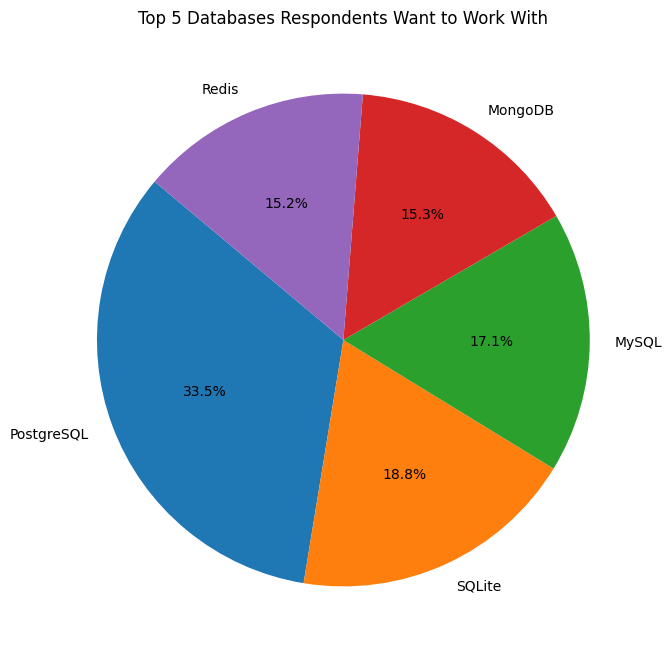

In [107]:
# Run the above SQL and store in df_db
df_db = pd.read_sql_query(QUERY, conn)

# Split semicolon-separated strings into lists
df_db['DatabaseWantToWorkWith'] = df_db['DatabaseWantToWorkWith'].str.split(';')

# Explode lists into rows
df_exploded = df_db.explode('DatabaseWantToWorkWith')

# Count occurrences
top_dbs = df_exploded['DatabaseWantToWorkWith'].value_counts().nlargest(5)

# Plot pie chart
top_dbs.plot.pie(autopct='%1.1f%%', startangle=140, figsize=(8, 8), ylabel='')
plt.title('Top 5 Databases Respondents Want to Work With')
plt.show()


**Stacked Charts** 

Create a stacked bar chart of median `TimeSearching` and `TimeAnswering` for the age group 30 to 35.


In [184]:
# Run query to get data
QUERY = """
SELECT Age, TimeSearching, TimeAnswering
FROM main
WHERE TimeSearching IS NOT NULL AND TimeAnswering IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)
print(df.head(20))

                Age               TimeSearching               TimeAnswering
0   35-44 years old         30-60 minutes a day        60-120 minutes a day
1   35-44 years old         30-60 minutes a day         15-30 minutes a day
2   45-54 years old        60-120 minutes a day        60-120 minutes a day
3   25-34 years old         15-30 minutes a day         30-60 minutes a day
4   25-34 years old  Less than 15 minutes a day         15-30 minutes a day
5   45-54 years old        60-120 minutes a day         15-30 minutes a day
6   35-44 years old         15-30 minutes a day  Less than 15 minutes a day
7   35-44 years old         30-60 minutes a day         30-60 minutes a day
8   25-34 years old        60-120 minutes a day         15-30 minutes a day
9   25-34 years old        60-120 minutes a day         15-30 minutes a day
10  35-44 years old        60-120 minutes a day        60-120 minutes a day
11  25-34 years old         30-60 minutes a day         15-30 minutes a day
12  25-34 ye

In [185]:
def extract_midpoint(text):
    try:
        parts = text.strip().split(' ')[0]  # Get "30-60"
        if '-' in parts:
            low, high = map(int, parts.split('-'))
            return (low + high) / 2
        else:
            return int(parts)  # single value (e.g., "60")
    except:
        return None

In [186]:
df['TimeSearchingNum'] = df['TimeSearching'].apply(extract_midpoint)
df['TimeAnsweringNum'] = df['TimeAnswering'].apply(extract_midpoint)

In [187]:
def map_age_midpoint(age_str):
    try:
        parts = age_str.split(' ')[0]  # "35-44"
        if '-' in parts:
            low, high = map(int, parts.split('-'))
            return (low + high) / 2
        elif 'Under' in age_str:
            return 14
        elif '65' in age_str:  # e.g., "65 years or older"
            return 70
    except:
        return None

In [188]:
df['AgeNum'] = df['Age'].apply(map_age_midpoint)


In [189]:
age_group = df[df['AgeNum'].between(30, 35)].dropna(subset=['TimeSearchingNum', 'TimeAnsweringNum'])


In [190]:
median_values = pd.DataFrame({
    'TimeSearching': [age_group['TimeSearchingNum'].median()],
    'TimeAnswering': [age_group['TimeAnsweringNum'].median()]
}, index=['Age 30–35'])


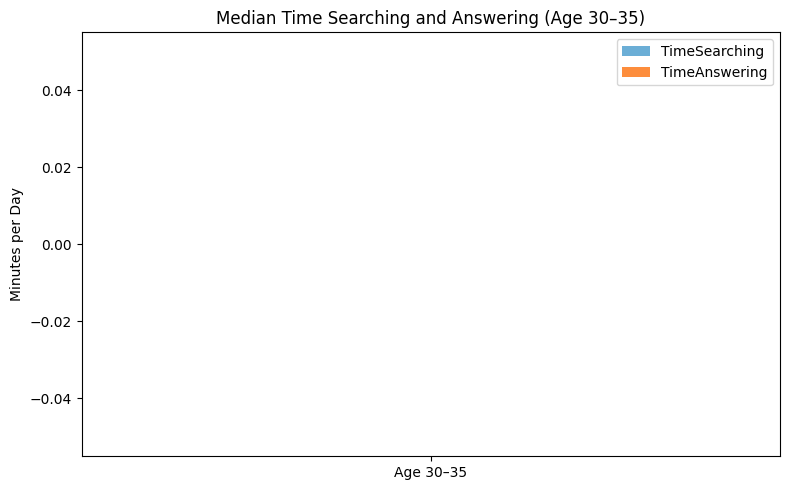

In [191]:
median_values.plot(
    kind='bar',
    stacked=True,
    figsize=(8, 5),
    color=['#6baed6', '#fd8d3c']
)

plt.title('Median Time Searching and Answering (Age 30–35)')
plt.ylabel('Minutes per Day')
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


### Visualizing Comparison of Data

**Line Chart**

Plot the median `CompTotal` for all ages from 45 to 60.


In [198]:
QUERY = """
SELECT Age, CompTotal
FROM main
WHERE Age IS NOT NULL AND CompTotal IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)

In [204]:
def map_age_midpoint(age_str):
    try:
        age_str = age_str.strip()
        if 'Under' in age_str:
            return 14
        elif '65' in age_str:
            return 70
        else:
            parts = age_str.split(' ')[0]  # "45-54"
            low, high = map(int, parts.split('-'))
            return (low + high) / 2
    except:
        return None

df['AgeNum'] = df['Age'].apply(map_age_midpoint)

In [200]:
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')

In [206]:
df_filtered = df[df['AgeNum'].between(45, 60) & df['CompTotal'].notna()]
print(f"Filtered rows: {len(df_filtered)}")
print(df_filtered[['Age', 'AgeNum', 'CompTotal']].head())

Filtered rows: 4795
                Age  AgeNum  CompTotal
6   45-54 years old    49.5    95000.0
7   45-54 years old    49.5   195000.0
9   55-64 years old    59.5    54000.0
10  45-54 years old    49.5   145000.0
15  55-64 years old    59.5    80000.0


In [201]:
df_filtered = df[df['AgeNum'].between(45, 60)].dropna(subset=['CompTotal'])

In [207]:
median_comp = df_filtered.groupby('AgeNum')['CompTotal'].median()

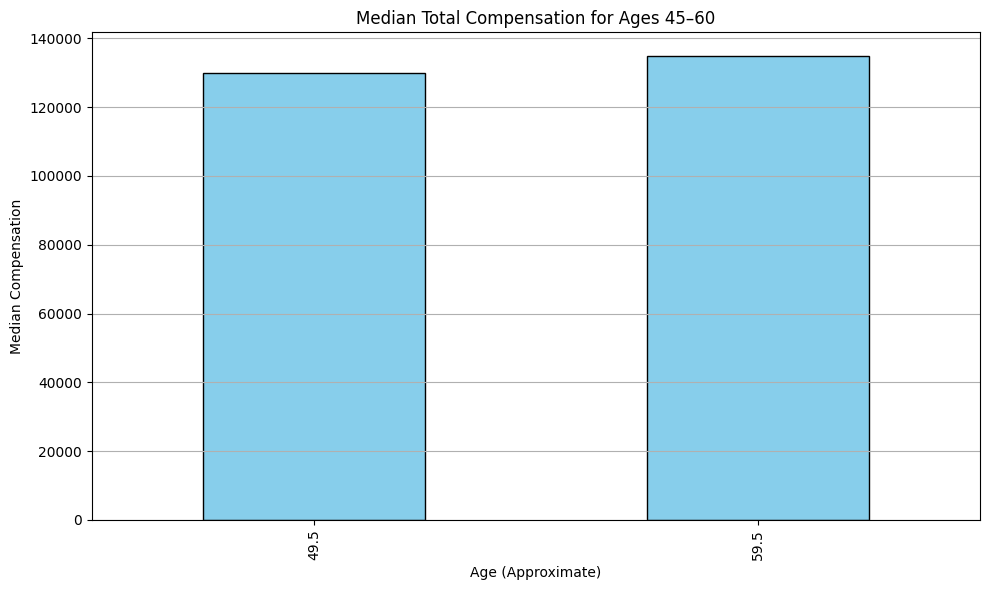

In [208]:
plt.figure(figsize=(10, 6))
median_comp.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Median Total Compensation for Ages 45–60')
plt.xlabel('Age (Approximate)')
plt.ylabel('Median Compensation')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**Bar Chart**

Create a horizontal bar chart using the `MainBranch` column.


In [209]:
QUERY = """
SELECT MainBranch, COUNT(*) AS Count
FROM main
WHERE MainBranch IS NOT NULL
GROUP BY MainBranch
ORDER BY Count DESC
"""

# Load data into DataFrame
df = pd.read_sql_query(QUERY, conn)

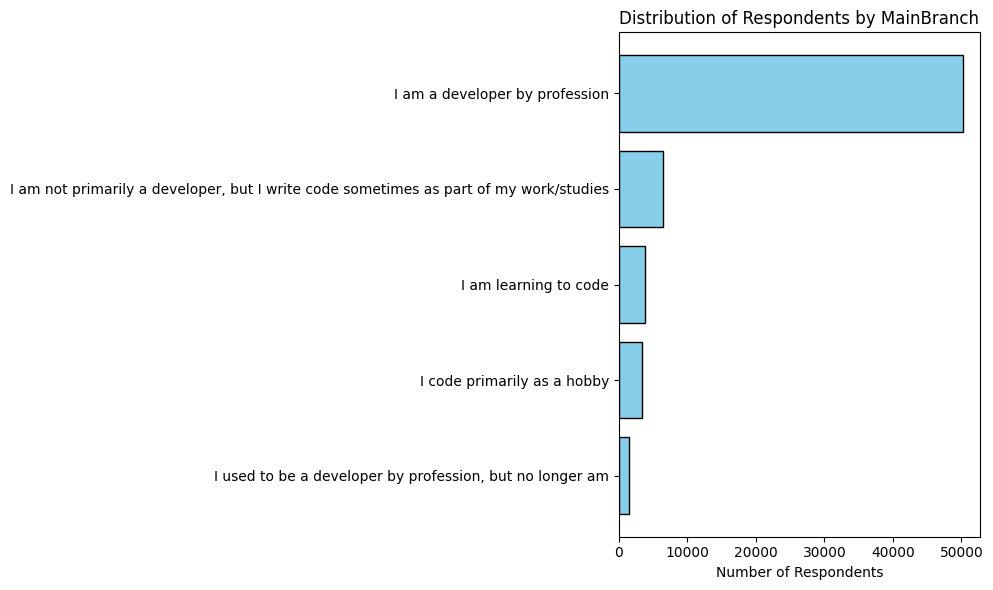

In [210]:
plt.figure(figsize=(10, 6))
plt.barh(df['MainBranch'], df['Count'], color='skyblue', edgecolor='black')
plt.xlabel('Number of Respondents')
plt.title('Distribution of Respondents by MainBranch')
plt.gca().invert_yaxis()  # Most common on top
plt.tight_layout()
plt.show()

### Summary


In this lab, you focused on extracting and visualizing data from an RDBMS using SQL queries and SQLite. You applied various visualization techniques, including:

- Histograms to display the distribution of CompTotal.
- Box plots to show the spread of ages.
- Scatter plots and bubble plots to explore relationships between variables like Age, WorkExp, `TimeSearching` and `TimeAnswering`.
- Pie charts and stacked charts to visualize the composition of data.
- Line charts and bar charts to compare data across categories.


### Close the Database Connection

Once the lab is complete, ensure to close the database connection:


In [ ]:
conn.close()

## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
